In [1]:
import numpy as np
import matplotlib.pyplot as plt
from deps import cv_core
import cv2
import glob
from deps.dobot_api import DobotApiDashboard, DobotApiMove

In [2]:
camera_res = {
            '240':(320,240),
            '480':(640,480),
            '600':(800,600),
            '768':(1024, 768),
            '960':(1280, 960),
            '1200':(1600, 1200),
            '1536':(2048, 1536),
            '1944':(2592, 1944),
            '2448':(3264, 2448)}

In [3]:
cap = cv2.VideoCapture(0)
cap = cv_core.set_res(cap, camera_res['768'])
cv_core.video_test(cap)
cap.release()

Qt: Session management error: Could not open network socket


In [3]:
features_mm_to_pixels_dict =  {(382.76, -113.37): (499, 412), #bottom left
                                (225.27, 94.68): (240, 103), #top right
                                (386.5, 91.55): (492, 98), # bottom right
                                (221.25, -110.62): (248, 419)} # top left

tf_mtx = cv_core.compute_tf_mtx(features_mm_to_pixels_dict)

In [11]:
cap = cv2.VideoCapture(0)
cap = cv_core.set_res(cap, camera_res['768'])
#out = cv2.VideoWriter('out.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 25, (640,480))
cont = cv_core.Contours()
while(True):
    ret, frame = cap.read()

    (a,b,r), sorted_contours = cont.find_contours(frame, 5)
    plot_img = frame.copy()
    cv2.circle(plot_img, (a, b), r, (0, 255, 0), 2)
    cv2.circle(plot_img, (a, b), 1, (255, 0, 0), 3)
    #with_contours = cv2.drawContours(plot_img, sorted_contours, -1,(0,255, 0),2)

    for c in sorted_contours:
        # compute the center of the contour
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        # draw the contour and center of the shape on the image
        #cv2.drawContours(plot_img, [c], -1, (0, 255, 0), 2)
        cv2.circle(plot_img, (cX, cY), 2, (0, 0, 255), -1)
        cv2.putText(plot_img, f"{cX},{cY}", (cX - 20, cY - 20),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    #out.write(with_contours)

    cv2.imshow('frame',plot_img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
#out.release()
cv2.destroyAllWindows()

In [14]:
# images = sorted(glob.glob('camera_data/raw/*.png'))


# font = cv2.FONT_HERSHEY_SIMPLEX
  
# # org
# org = (50, 50)
  
# # fontScale
# fontScale = 1
   
# # Blue color in BGR
# color = (0, 255, 0)
  
# # Line thickness of 2 px
# thickness = 2

# for idx, image in enumerate(images):
#     img = cv2.imread(image)
#     img = cv2.putText(img, f'{idx}', org, font, 
#                    fontScale, color, thickness, cv2.LINE_AA)
#     cv2.imwrite(f'camera_data/marked/image{idx}.png', img)

In [40]:
cameraMatrix = np.load('./cam_matrices/cam_mtx.npy')
dist = np.load('./cam_matrices/dist.npy')
newCameraMatrix = np.load('./cam_matrices/newcam_mtx.npy')

cap = cv2.VideoCapture(0)
cap = cv_core.set_res(cap, camera_res['1200'])

while True:
    ret, frame = cap.read()
    
    frame = cv2.undistort(frame, cameraMatrix, dist, None, newCameraMatrix)
    cv2.namedWindow('frame', cv2.WINDOW_NORMAL)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
            
cap.release()
cv2.destroyAllWindows()

In [3]:
cont = cv_core.Contours()
cap = cv2.VideoCapture(0)
cap = cv_core.set_res(cap, camera_res['768'])
centers = cont.wait_for_anchors(cap, show = True)
cap.release()

Qt: Session management error: Could not open network socket


In [5]:
dash = DobotApiDashboard('192.168.1.6', 29999)
move = DobotApiMove('192.168.1.6', 30003)

In [7]:
dash.ClearError()
dash.EnableRobot()

'0,{},EnableRobot();'

In [48]:
dash.DisableRobot()

NameError: name 'dash' is not defined

In [16]:
frame.shape

(1200, 1600, 3)

In [22]:
cameraMatrix = np.load('./cam_matrices/cam_mtx.npy')
dist = np.load('./cam_matrices/dist.npy')
newCameraMatrix = np.load('./cam_matrices/newcam_mtx.npy')

cap = cv2.VideoCapture(0)
cap = cv_core.set_res(cap, camera_res['1200'])

while True:
    ret, frame = cap.read()
    
    frame = cv2.undistort(frame, cameraMatrix, dist, None, newCameraMatrix)

    cv2.line(frame, (int(frame.shape[1]/2), 0), (int(frame.shape[1]/2), frame.shape[0]), (0, 255, 0), thickness=2)

    cv2.namedWindow('frame', cv2.WINDOW_NORMAL)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [23]:
img = frame.copy()
cv2.imshow('frame',np.split(img,2, axis = 1)[1])
cv2.waitKey(0)
cv2.destroyAllWindows()

# New circle detector

In [14]:
cap = cv2.VideoCapture(0)
cap = cv_core.set_res(cap, (1024, 768))

while True:
    ret, frame = cap.read()

    # img = frame
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,5)
    # #_,img = cv2.threshold(img,127,255,cv.THRESH_BINARY)
    # kernel = np.ones((2,2),np.uint8)
    # img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    # #img = cv2.Canny(img, 5, 70, 3)

    # blurred = cv2.blur(img, (7, 7))

    # detected_circles = cv2.HoughCircles(image=blurred,
    #                                     method=cv2.HOUGH_GRADIENT,
    #                                     dp=1.5,
    #                                     minDist=500,
    #                                     param1=100,
    #                                     param2=50,
    #                                     minRadius=50,
    #                                     maxRadius=300
    #                                     )

    # detected_circles = np.uint16(np.around(detected_circles))
    # pt = detected_circles[0][0]
    # a, b, r = pt
    # plot_img = frame.copy()
    # cv2.circle(plot_img, (a, b), r, (0, 255, 0), 2)
    # cv2.circle(plot_img, (a, b), 1, (255, 0, 0), 3)

    img = frame.copy()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    blur = cv2.GaussianBlur(img,(3,3),0)
    ret, thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    #ret,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    kernel = np.ones((3,3),np.uint8)
    #closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    #opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    dilation = cv2.dilate(thresh,kernel,iterations = 3)

    blurred = cv2.blur(dilation, (7, 7))
    detected_circles = cv2.HoughCircles(image=blurred,
                                        method=cv2.HOUGH_GRADIENT,
                                        dp=1.2,
                                        minDist=500,
                                        param1=100,
                                        param2=50,
                                        minRadius=50,
                                        maxRadius=300
                                        )

    detected_circles = np.uint16(np.around(detected_circles))
    pt = detected_circles[0][0]
    a, b, r = pt
    plot_img = frame.copy()
    cv2.circle(plot_img, (a, b), r, (0, 255, 0), 2)
    cv2.circle(plot_img, (a, b), 1, (255, 0, 0), 3)

    cv2.imshow('frame', plot_img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[ WARN:0@528.662] global /io/opencv/modules/videoio/src/cap_v4l.cpp (902) open VIDEOIO(V4L2:/dev/video0): can't open camera by index


AttributeError: 'NoneType' object has no attribute 'copy'

In [3]:
cv2.imwrite('test.png', frame)

True

In [24]:
img = frame.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,55,7)
_,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
kernel = np.ones((2,2),np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
#res = cv2.Canny(closing, 5, 70, 3)

blurred = cv2.blur(closing, (7, 7))

detected_circles = cv2.HoughCircles(image=blurred,
                                    method=cv2.HOUGH_GRADIENT,
                                    dp=1.2,
                                    minDist=10,
                                    param1=50,
                                    param2=50,
                                    minRadius=0,
                                    maxRadius=300
                                    )

detected_circles = np.uint16(np.around(detected_circles))
pt = detected_circles[0][0]
a, b, r = pt
plot_img = frame.copy()
cv2.circle(plot_img, (a, b), r, (0, 255, 0), 2)
cv2.circle(plot_img, (a, b), 1, (255, 0, 0), 3)


#blurred = cv2.GaussianBlur(res, (5, 5), 0)
#closing = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, kernel)
#closing = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, kernel)

# opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

cv2.imshow('frame',plot_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
#mop up the dirt
# cv2.dilate(g, g, None, 1)
# cv2.erode(g, g, None, 1)

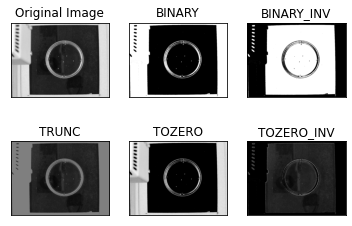

In [11]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = frame
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [16]:
cv2.imshow('frame',frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
img = frame.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(img,(3,3),0)
ret, thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#ret,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
#closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
#opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
dilation = cv2.dilate(thresh,kernel,iterations = 3)

blurred = cv2.blur(dilation, (7, 7))
detected_circles = cv2.HoughCircles(image=blurred,
                                    method=cv2.HOUGH_GRADIENT,
                                    dp=1.2,
                                    minDist=500,
                                    param1=100,
                                    param2=50,
                                    minRadius=50,
                                    maxRadius=300
                                    )
res = cv2.Canny(erosion, 5, 70, 3)
detected_circles = np.uint16(np.around(detected_circles))
pt = detected_circles[0][0]
a, b, r = pt
plot_img = frame.copy()
cv2.circle(plot_img, (a, b), r, (0, 255, 0), 2)
cv2.circle(plot_img, (a, b), 1, (255, 0, 0), 3)

cv2.imshow('frame',blurred)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
img = frame.copy()
#img_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)


img_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

mask1 = cv2.inRange(img_hsv, (0,50,20), (5,255,255))
mask2 = cv2.inRange(img_hsv, (175,50,20), (180,255,255))
mask = cv2.bitwise_or(mask1, mask2)
kernel = np.ones((3,3),np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# mask1 = cv2.inRange(img_hsv, (0,50,20), (5,255,255))
# mask2 = cv2.inRange(img_hsv, (175,50,20), (180,255,255))
# mask = cv2.bitwise_or(mask1, mask2)

# kernel = np.ones((3,3),np.uint8)
# erosion = cv2.erode(mask1,kernel,iterations = 1)
# kernel = np.ones((2,2),np.uint8)
# dilation = cv2.dilate(erosion,kernel,iterations = 4)

# kernel = np.ones((2,2),np.uint8)
# mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)

cv2.imshow('frame', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Well plate

In [12]:
cap = cv2.VideoCapture(0)
cap = cv_core.set_res(cap, (1024, 768))

while True:
    ret, frame = cap.read()

    img = frame.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # blur = cv2.GaussianBlur(thresh, (5,5), 0)
    # kernel = np.ones((4,4), np.uint8)
    # erosion = cv2.erode(blur, kernel, iterations=1)

    # kernel = np.ones((3,3),np.uint8)
    # #closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    # #opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    # dilation = cv2.dilate(thresh,kernel,iterations = 3)

    # blurred = cv2.blur(dilation, (7, 7))
    detected_circles = cv2.HoughCircles(image=gray,
                                        method=cv2.HOUGH_GRADIENT,
                                        dp=1,
                                        minDist=30,
                                        param1=100,
                                        param2=40,
                                        minRadius=1,
                                        maxRadius=30
                                        )

    if detected_circles is not None and detected_circles.shape[1] == 96:
        break
cap.release()
plot_img = frame.copy()
circles = np.uint16(np.around(detected_circles))
for i in circles[0,:]:
    center = (i[0], i[1])

    cv2.circle(plot_img, center, 1, (255, 0 ,0), 3)
    radius = i[2]
    cv2.circle(plot_img, center, radius, (0, 255 ,0), 3)

cv2.imshow('frame', plot_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [11]:
centers = circles[0][:,:-1]

In [12]:

cv2.imshow('frame', plot_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
img = frame.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(img,(3,3),0)
ret, thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
kernel = np.ones((4,4),np.uint8)
erosion = cv2.erode(thresh,kernel,iterations = 1)
res = cv2.Canny(erosion, 5, 70, 3)
#kernel = np.ones((2,2),np.uint8)
#opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

blurred = cv2.blur(res, (5, 5))

# contours, hierarchy = cv2.findContours(
#             blurred, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

detected_circles = cv2.HoughCircles(image=blurred,
                                        method=cv2.HOUGH_GRADIENT,
                                        dp=1.2,
                                        minDist=25,
                                        param1=50,
                                        param2=50,
                                        minRadius=10,
                                        maxRadius=30
                                        )

plot_img = frame.copy()
#with_contours = cv2.drawContours(plot_img, contours, -1,(0,255, 0),2)
circles_img = np.uint16(np.around(detected_circles))
for i in circles_img[0,:]:
    cv2.circle(plot_img,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(plot_img,(i[0],i[1]),2,(0,0,255),3)

cv2.imshow('frame', erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from scipy import ndimage

# Load in image, convert to gray scale, and Otsu's threshold
image = frame.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove small noise by filtering using contour area
cnts = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

for c in cnts:
    if cv2.contourArea(c) < 1000:
        cv2.drawContours(thresh,[c], 0, (0,0,0), -1)

cv2.imshow('thresh', thresh)
# Compute Euclidean distance from every binary pixel
# to the nearest zero pixel then find peaks
distance_map = ndimage.distance_transform_edt(thresh)
local_max = peak_local_max(distance_map, indices=False, min_distance=20, labels=thresh)

# Perform connected component analysis then apply Watershed
markers = ndimage.label(local_max, structure=np.ones((3, 3)))[0]
labels = watershed(-distance_map, markers, mask=thresh)

# Iterate through unique labels
for label in np.unique(labels):
    if label == 0:
        continue

    # Create a mask
    mask = np.zeros(gray.shape, dtype="uint8")
    mask[labels == label] = 255

    # Find contours and determine contour area
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    c = max(cnts, key=cv2.contourArea)
    cv2.drawContours(image, [c], -1, (36,255,12), -1)

cv2.imshow('image', image)
cv2.waitKey()

/tmp/ipykernel_13336/2487679775.py:22: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(distance_map, indices=False, min_distance=20, labels=thresh)


113

: 

In [8]:
frame = cv2.imread('camera_data/raw/image0.png')

In [22]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#blur = cv2.GaussianBlur(gray,(11,11),0)
#ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

ret,thresh = cv2.threshold(gray,125,255,cv2.THRESH_BINARY)
#kernel = np.ones((3,3),np.uint8)
#closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
#opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)#
#dilation = cv2.dilate(thresh,kernel,iterations = 3)

#blur2 = cv2.blur(dilation, (7, 7))
#blur3 = cv2.blur(closing, (7, 7))

cv2.imshow('frame', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
cap = cv2.VideoCapture(0)
cap = cv_core.set_res(cap, (1024, 768))

while True:
    ret, frame = cap.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(3,3),0)
    ret,thresh = cv2.threshold(blur,100,255,cv2.THRESH_BINARY)
    #ret, thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    kernel = np.ones((3,3),np.uint8)
    #closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    #opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    dilation = cv2.dilate(thresh,kernel,iterations = 3)

    blur2 = cv2.blur(dilation, (7, 7))
    detected_circles = cv2.HoughCircles(image=blur2,
                                        method=cv2.HOUGH_GRADIENT,
                                        dp=1.2,
                                        minDist=500,
                                        param1=100,
                                        param2=50,
                                        minRadius=50,
                                        maxRadius=300
                                        )

    plot_img = frame.copy()
#with_contours = cv2.drawContours(plot_img, contours, -1,(0,255, 0),2)
    circles_img = np.uint16(np.around(detected_circles))
    for i in circles_img[0,:]:
        cv2.circle(plot_img,(i[0],i[1]),i[2],(0,255,0),2)
        cv2.circle(plot_img,(i[0],i[1]),2,(0,0,255),3)


    cv2.imshow('frame', plot_img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()